In [19]:
from sklearn.metrics import recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((-1, 28, 28, 1)).astype("float32") / 255.0  #데이터 개수, 이미지크기, 흑백/컬러
test_images = test_images.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

In [11]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 3s - 2ms/step - accuracy: 0.9542 - loss: 0.1536
Epoch 2/5
1875/1875 - 3s - 2ms/step - accuracy: 0.9839 - loss: 0.0538
Epoch 3/5
1875/1875 - 3s - 1ms/step - accuracy: 0.9898 - loss: 0.0334
Epoch 4/5
1875/1875 - 3s - 2ms/step - accuracy: 0.9930 - loss: 0.0222
Epoch 5/5
1875/1875 - 3s - 2ms/step - accuracy: 0.9944 - loss: 0.0160


In [14]:
loss, accuracy = model.evaluate(test_images, test_labels)
print("accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.9814 - loss: 0.0563
accuracy: 0.98580002784729


In [15]:
image = test_images[8]
label = test_labels[8]
pred = model.predict(image.reshape(1, 28, 28, 1))
pred_label = np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


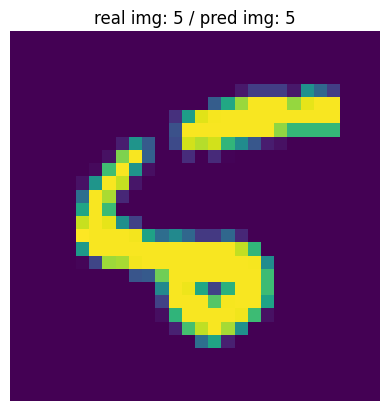

In [16]:
plt.imshow(image.reshape(28, 28))
plt.title(f"real img: {label} / pred img: {pred_label}")
plt.axis('off')
plt.show()

In [27]:
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

recall = recall_score(test_labels, y_pred_labels, average='macro')
f1 = f1_score(test_labels, y_pred_labels, average='macro')
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
Recall: 0.9859
F1 Score: 0.9857


              precision    recall  f1-score   support

           0     0.9918    0.9898    0.9908       980
           1     0.9973    0.9815    0.9893      1135
           2     0.9931    0.9767    0.9849      1032
           3     0.9843    0.9921    0.9882      1010
           4     0.9908    0.9868    0.9888       982
           5     0.9854    0.9843    0.9849       892
           6     0.9714    0.9937    0.9825       958
           7     0.9779    0.9912    0.9845      1028
           8     0.9766    0.9846    0.9806       974
           9     0.9880    0.9782    0.9831      1009

    accuracy                         0.9858     10000
   macro avg     0.9857    0.9859    0.9857     10000
weighted avg     0.9859    0.9858    0.9858     10000



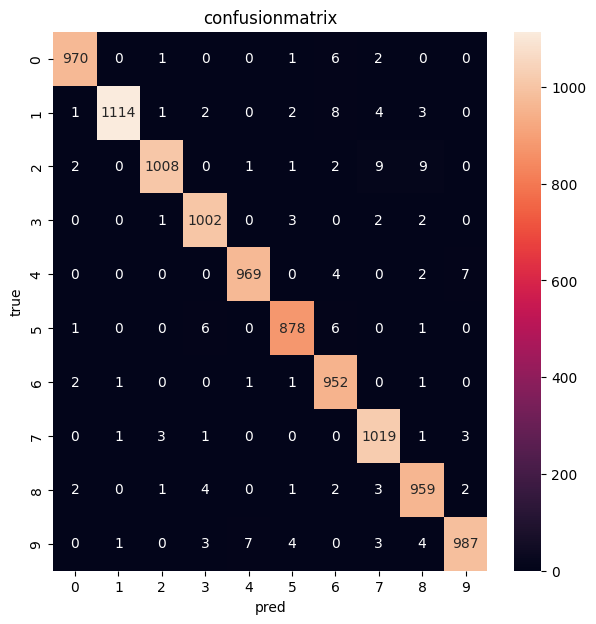

In [29]:
print(classification_report(test_labels, y_pred_labels, digits=4))

cm = confusion_matrix(test_labels, y_pred_labels)

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('true')
plt.title('confusionmatrix')
plt.show()